In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('house pricing/train.csv')

In [2]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df['Alley'].isnull().sum().sum()/(df.shape[0])

0.9376712328767123

In [6]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
df['Alley'].fillna(value='None',inplace=True)

In [8]:
import statistics as s
df['LotFrontage'].fillna(value=s.median(df['LotFrontage']),inplace=True)

In [9]:
# Check which variables have missing values

columns_with_missing_values =df.columns[df.isnull().any()]
columns_with_missing_values

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [10]:
columns_with_missing_values1 =df[columns_with_missing_values].isnull().sum()
columns_with_missing_values1

LotFrontage      259
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

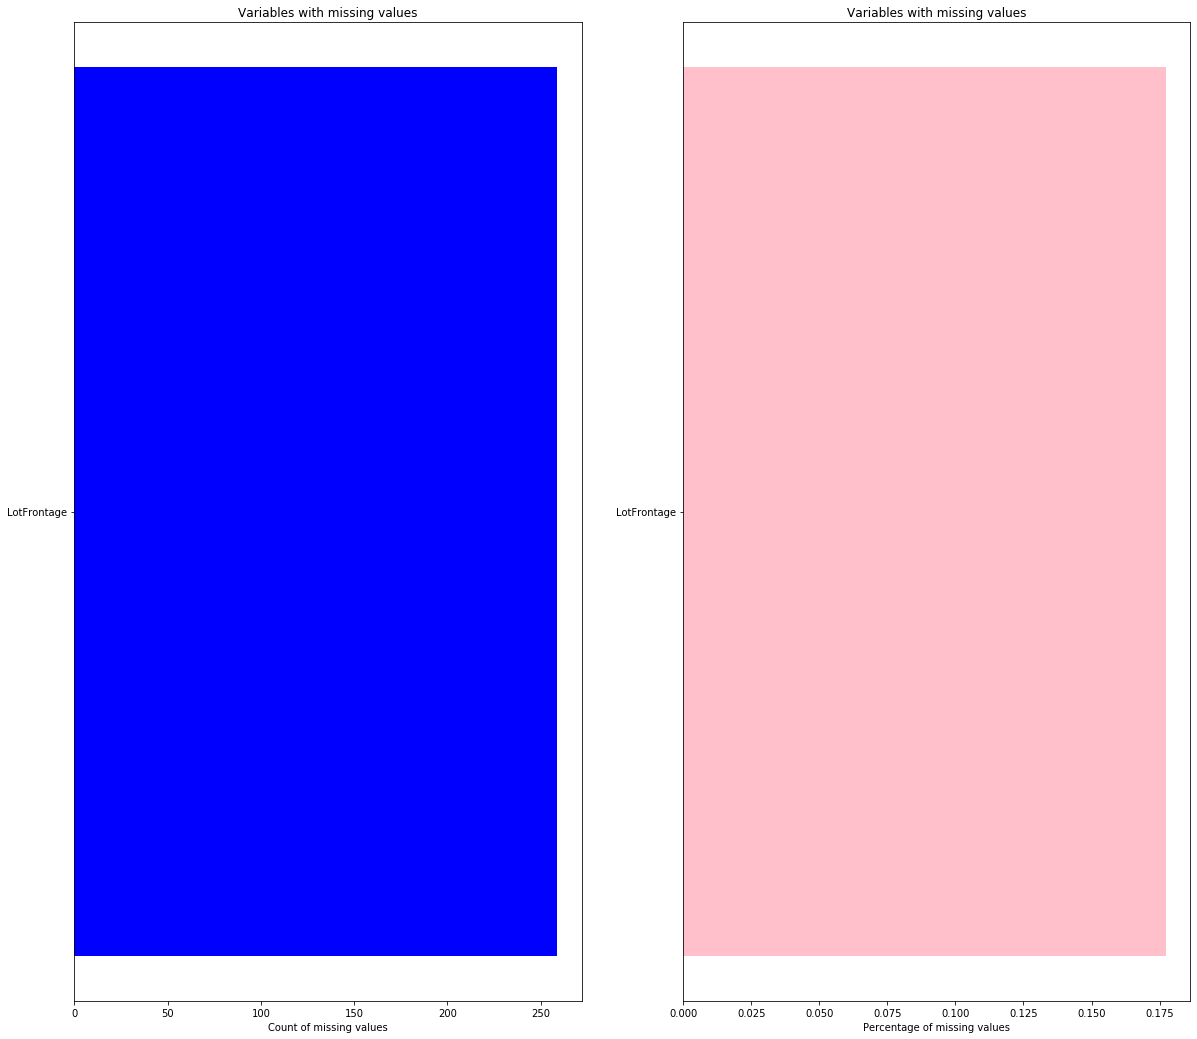

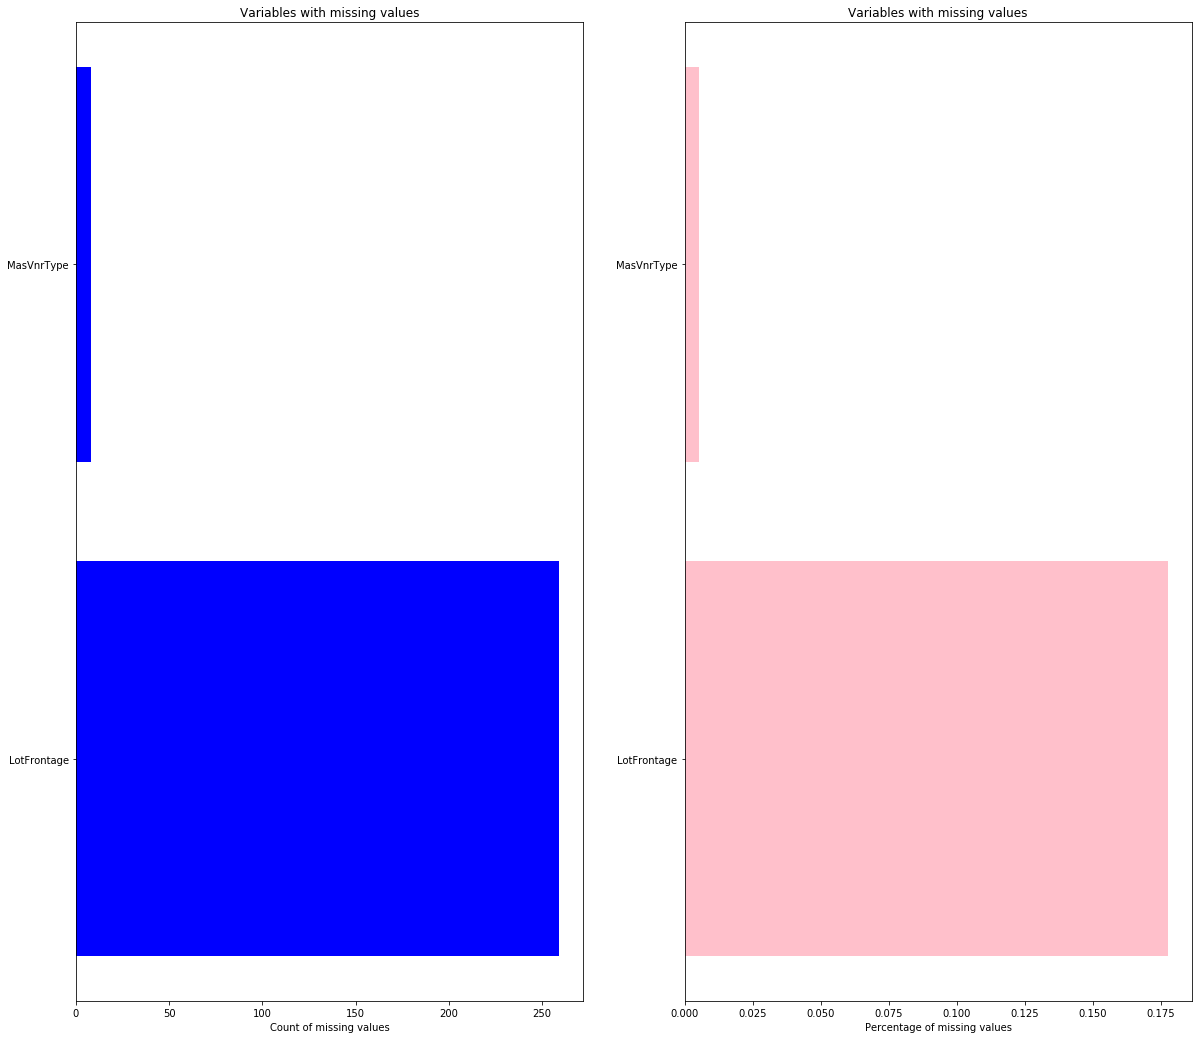

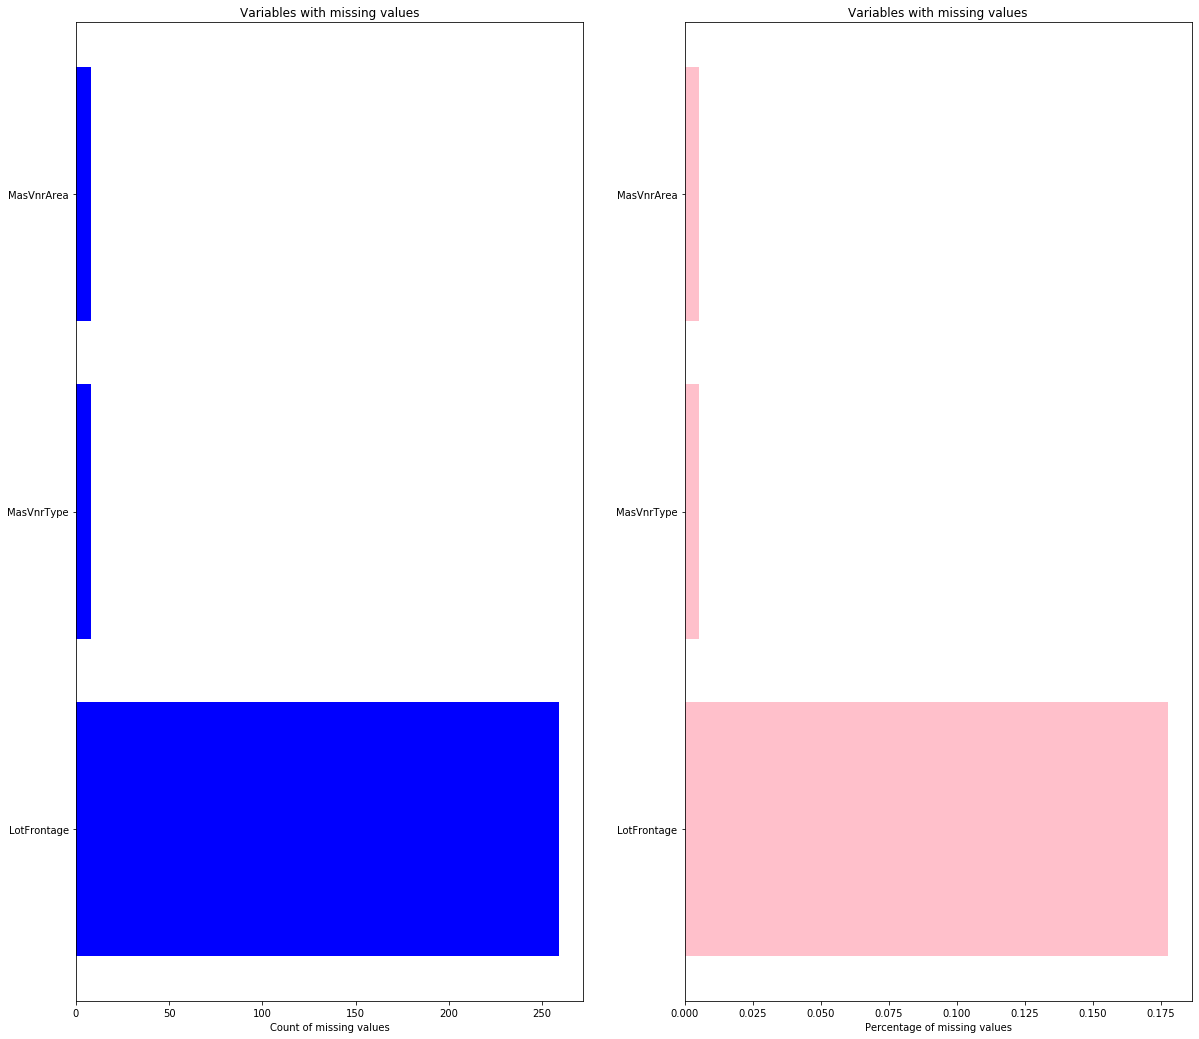

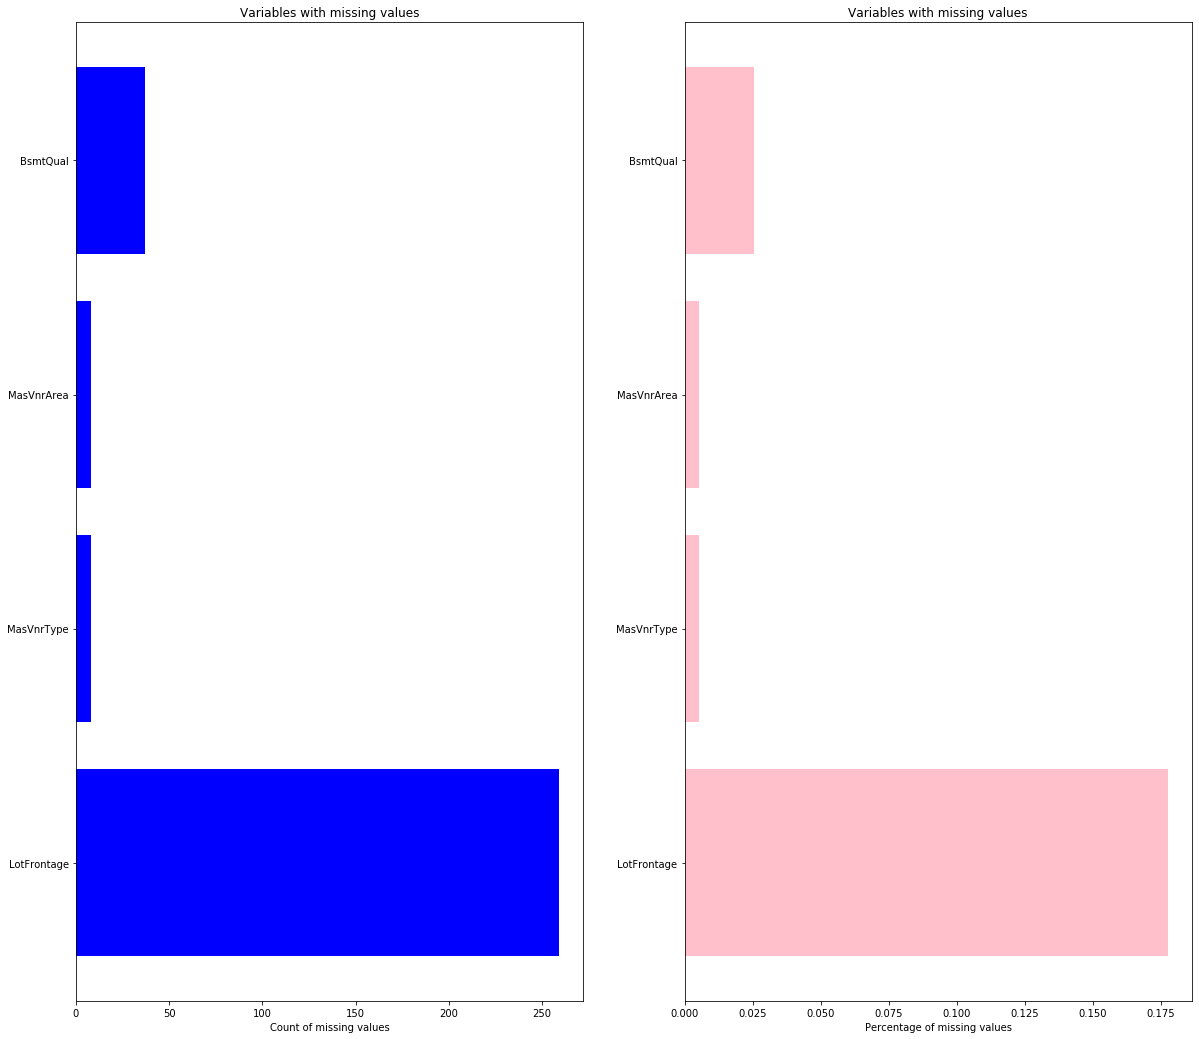

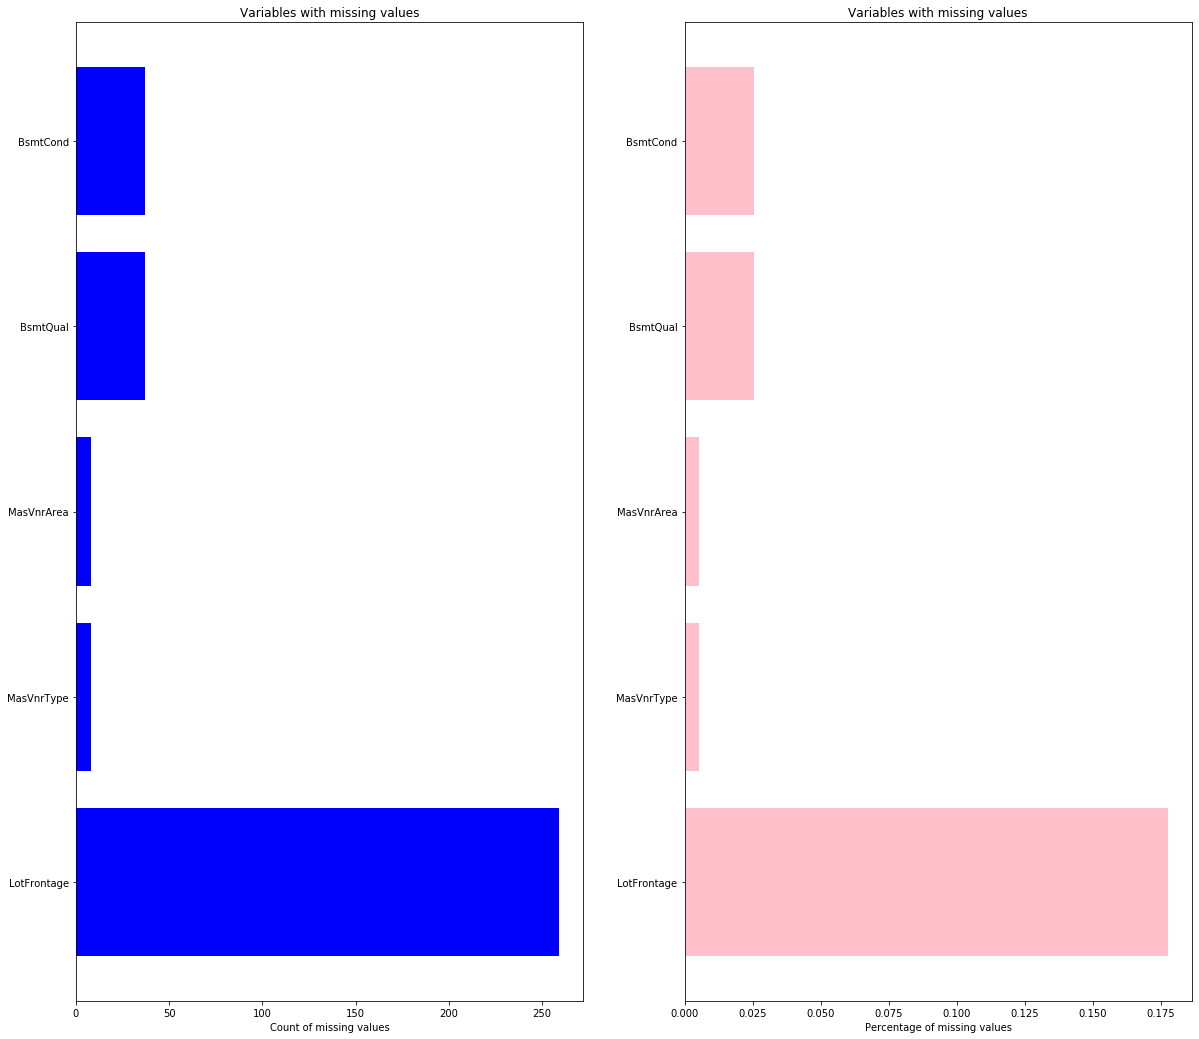

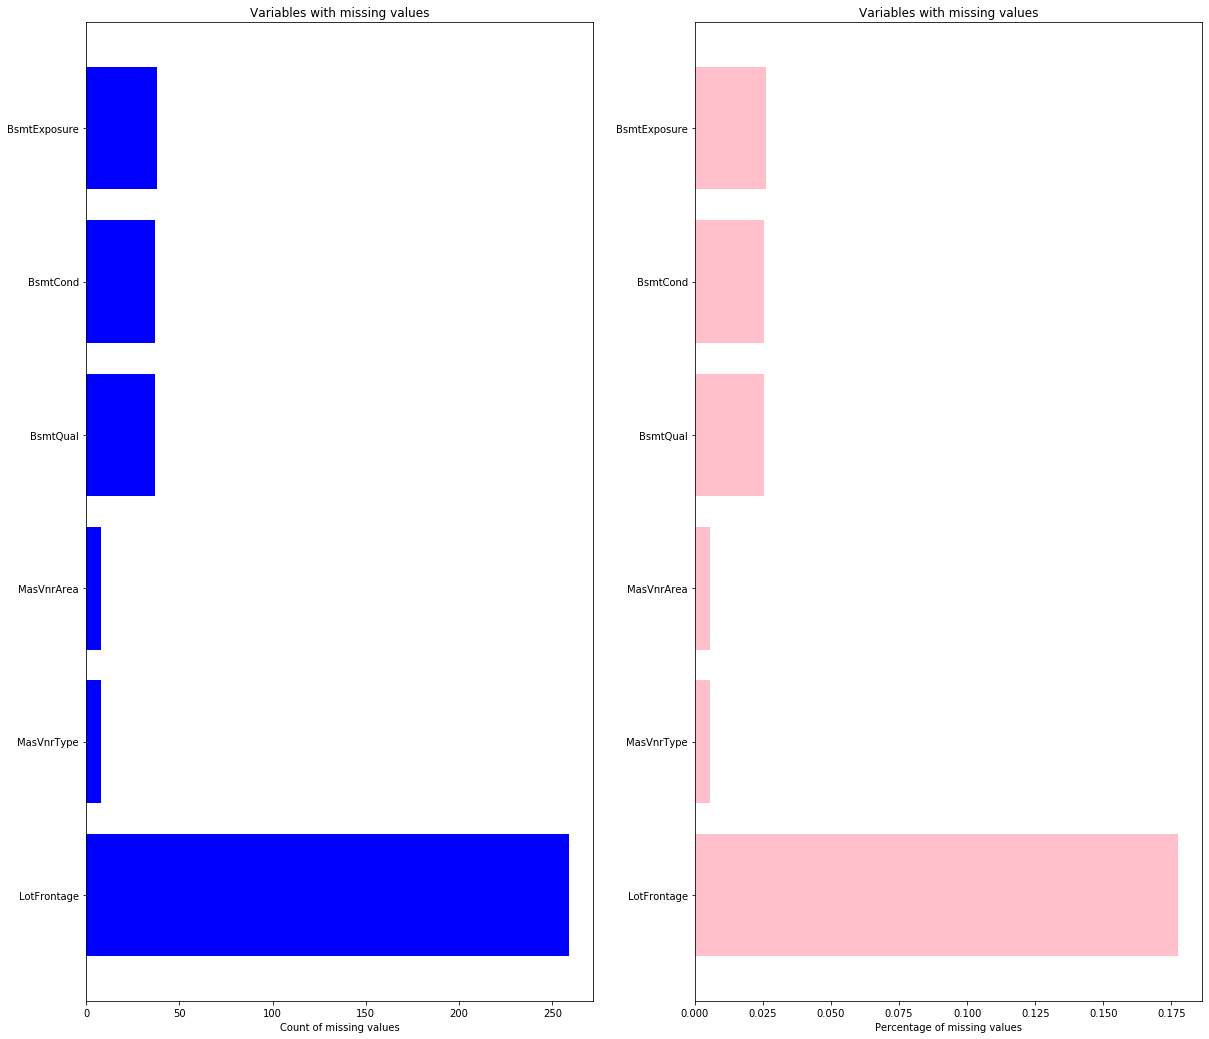

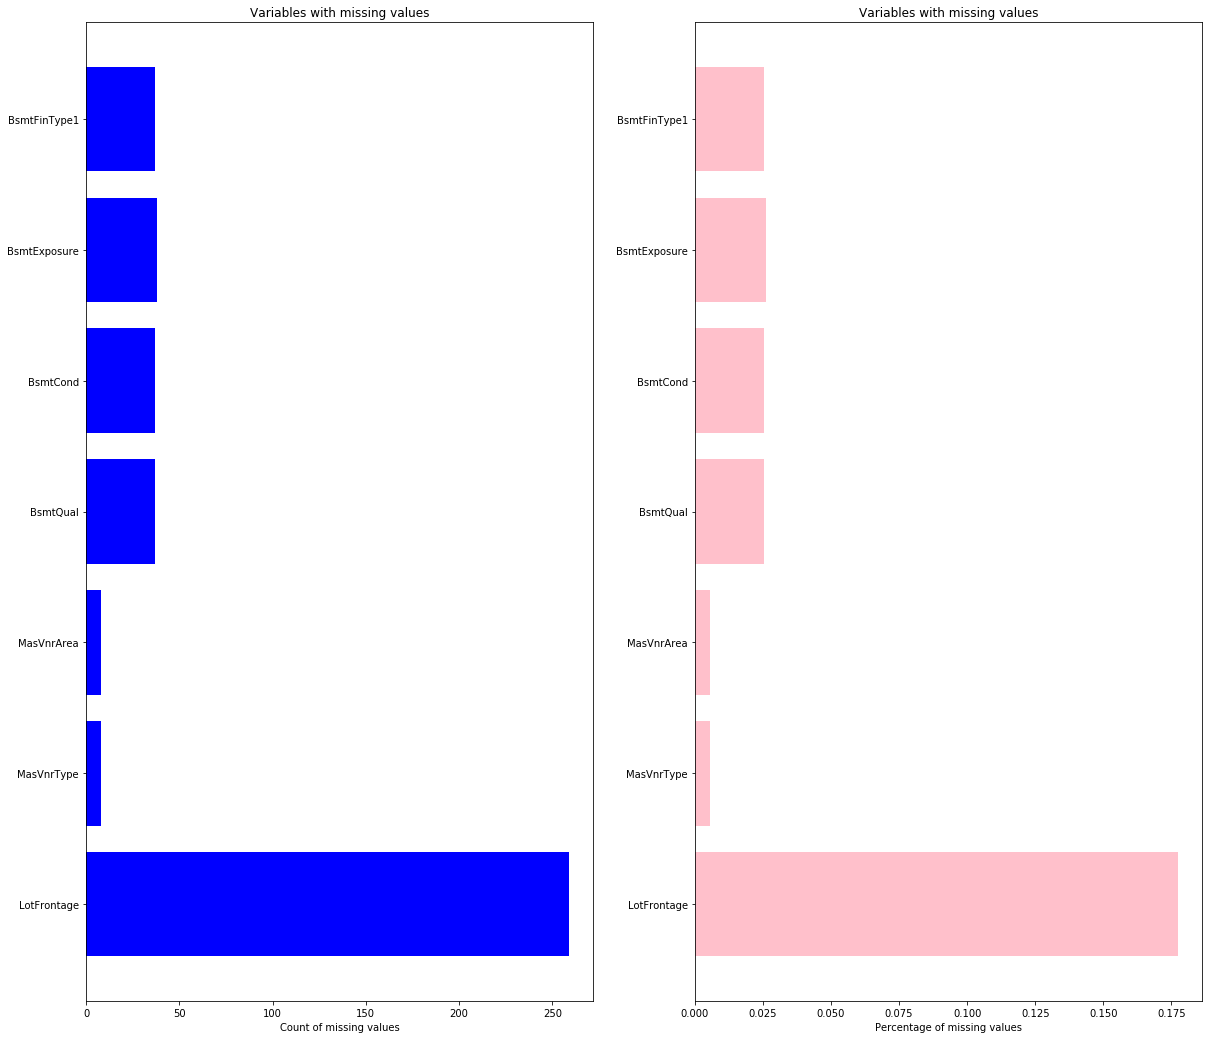

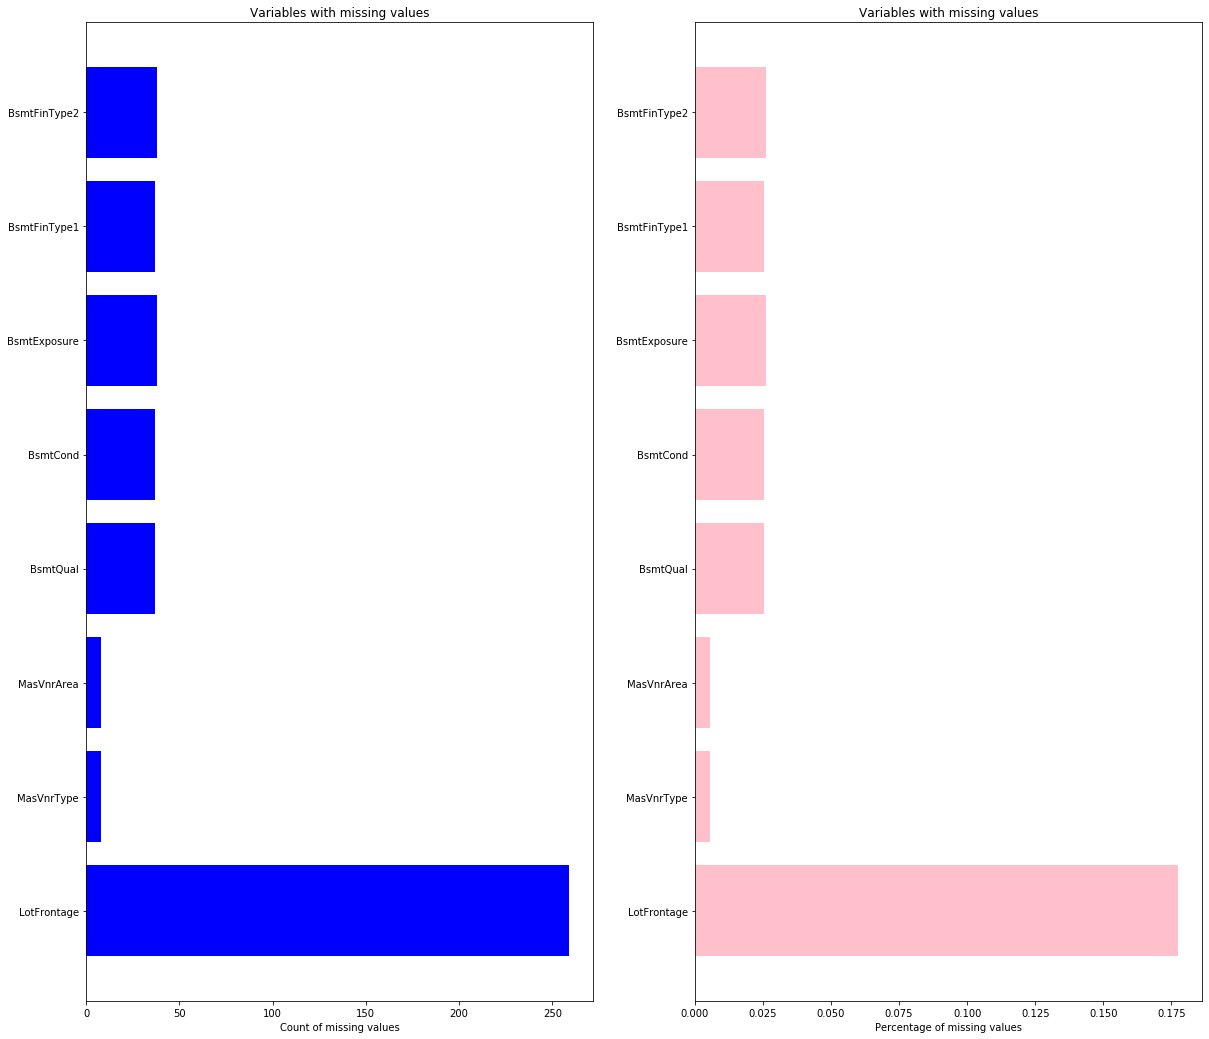

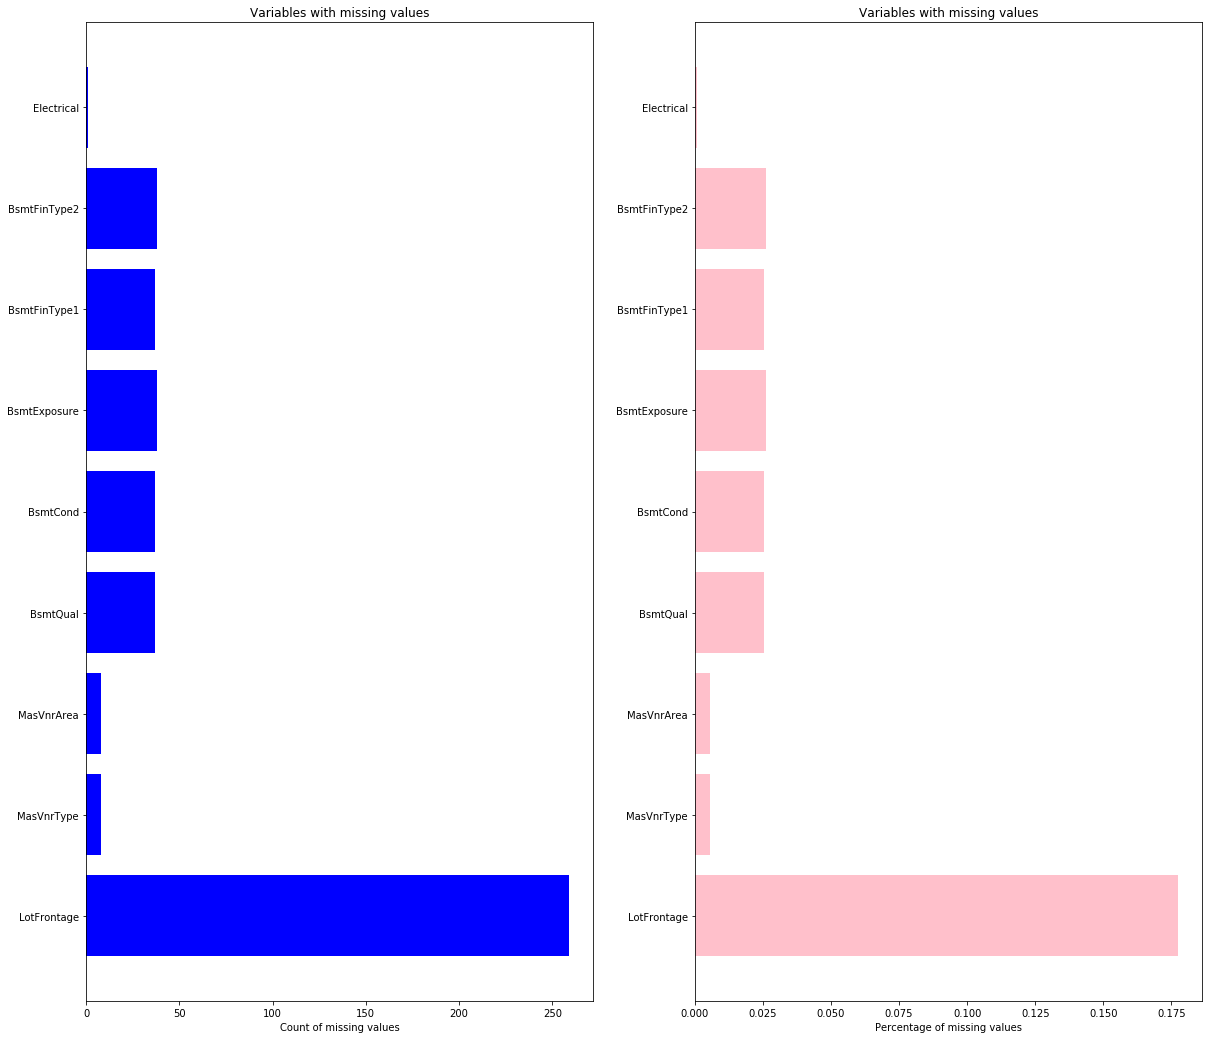

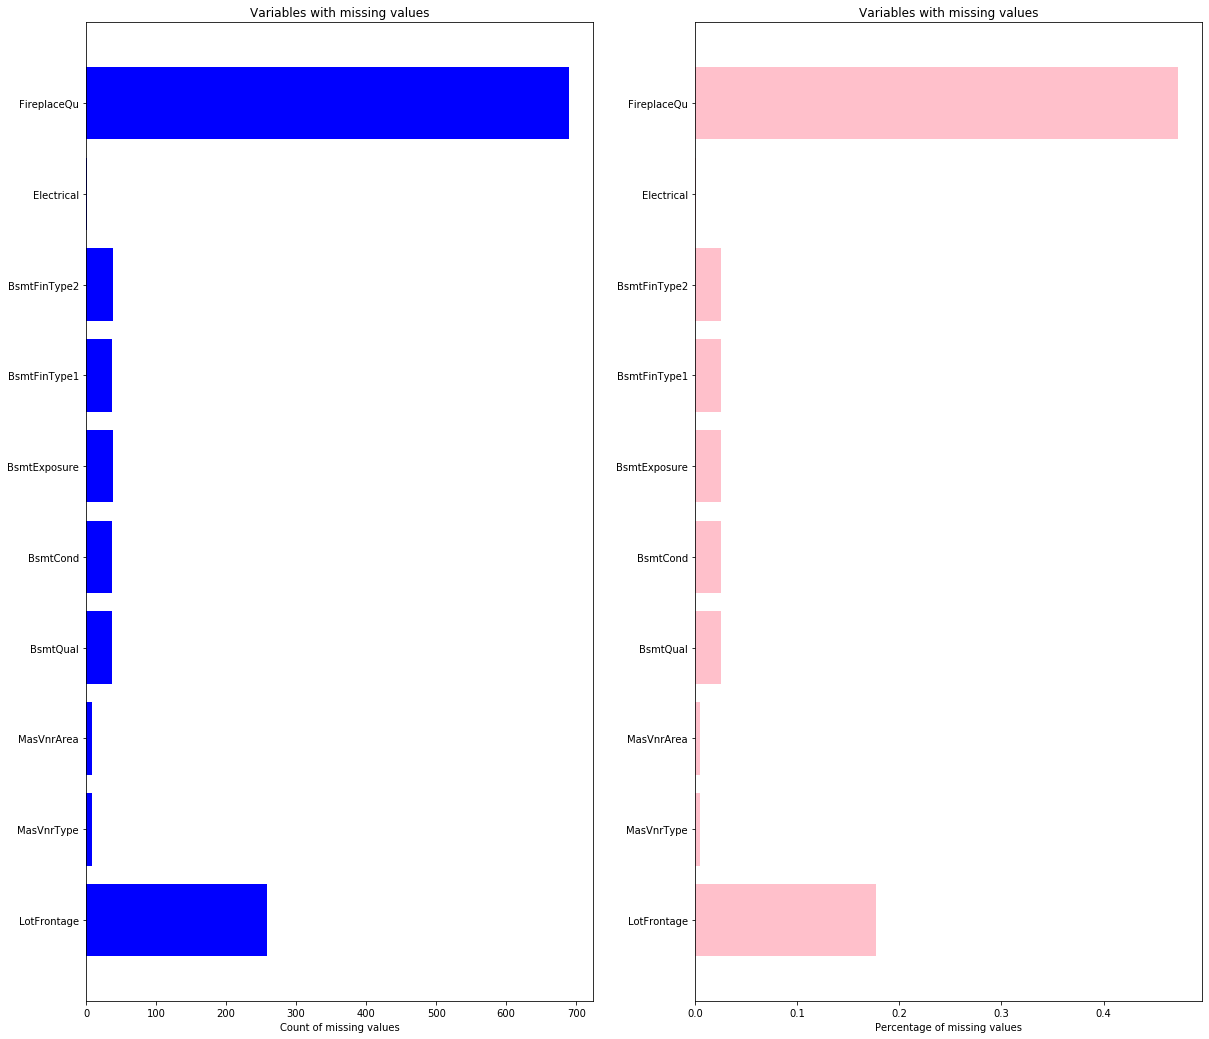

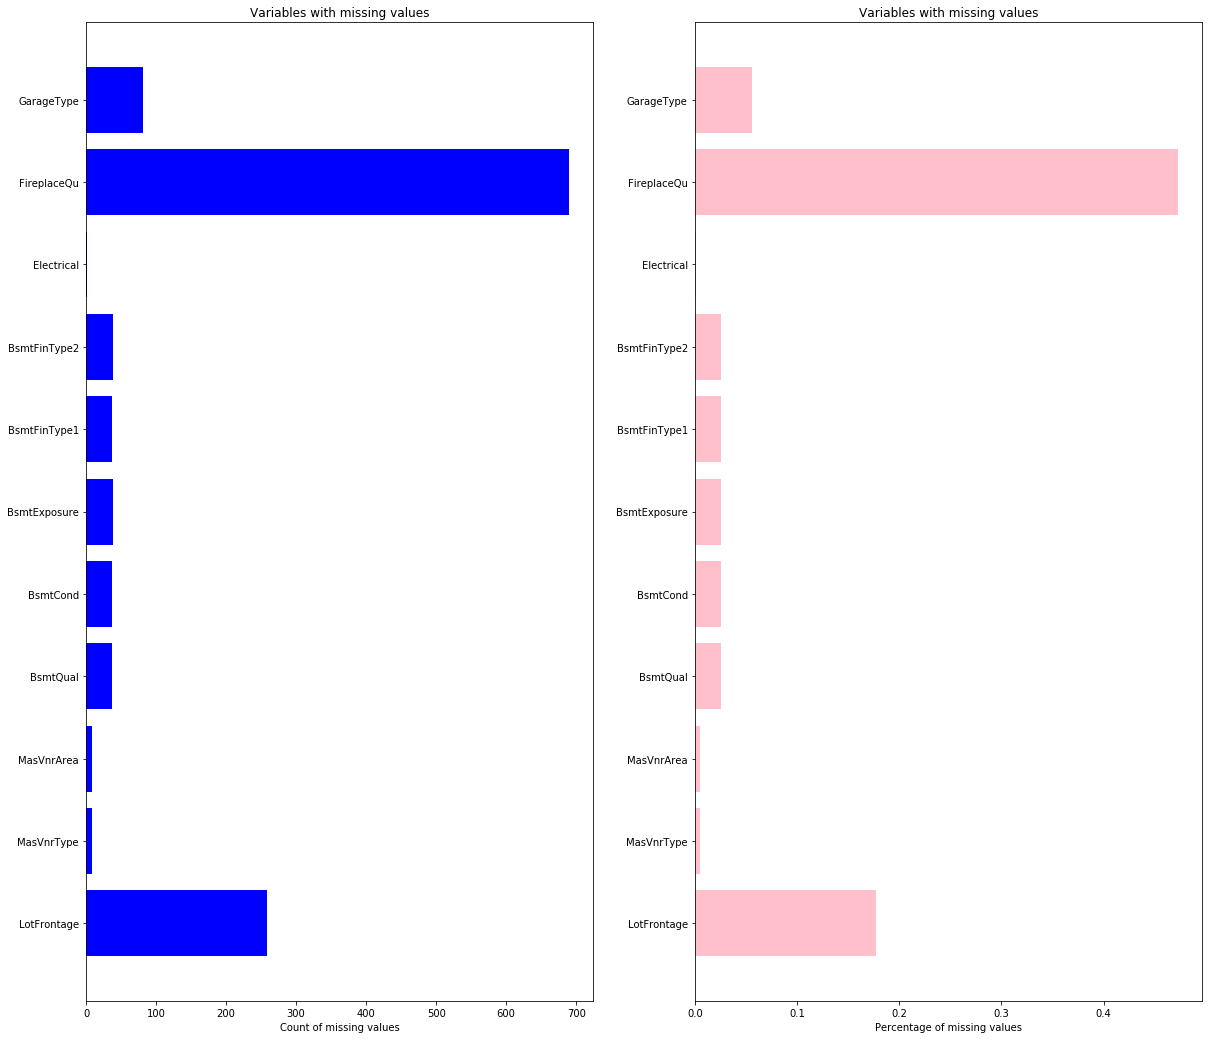

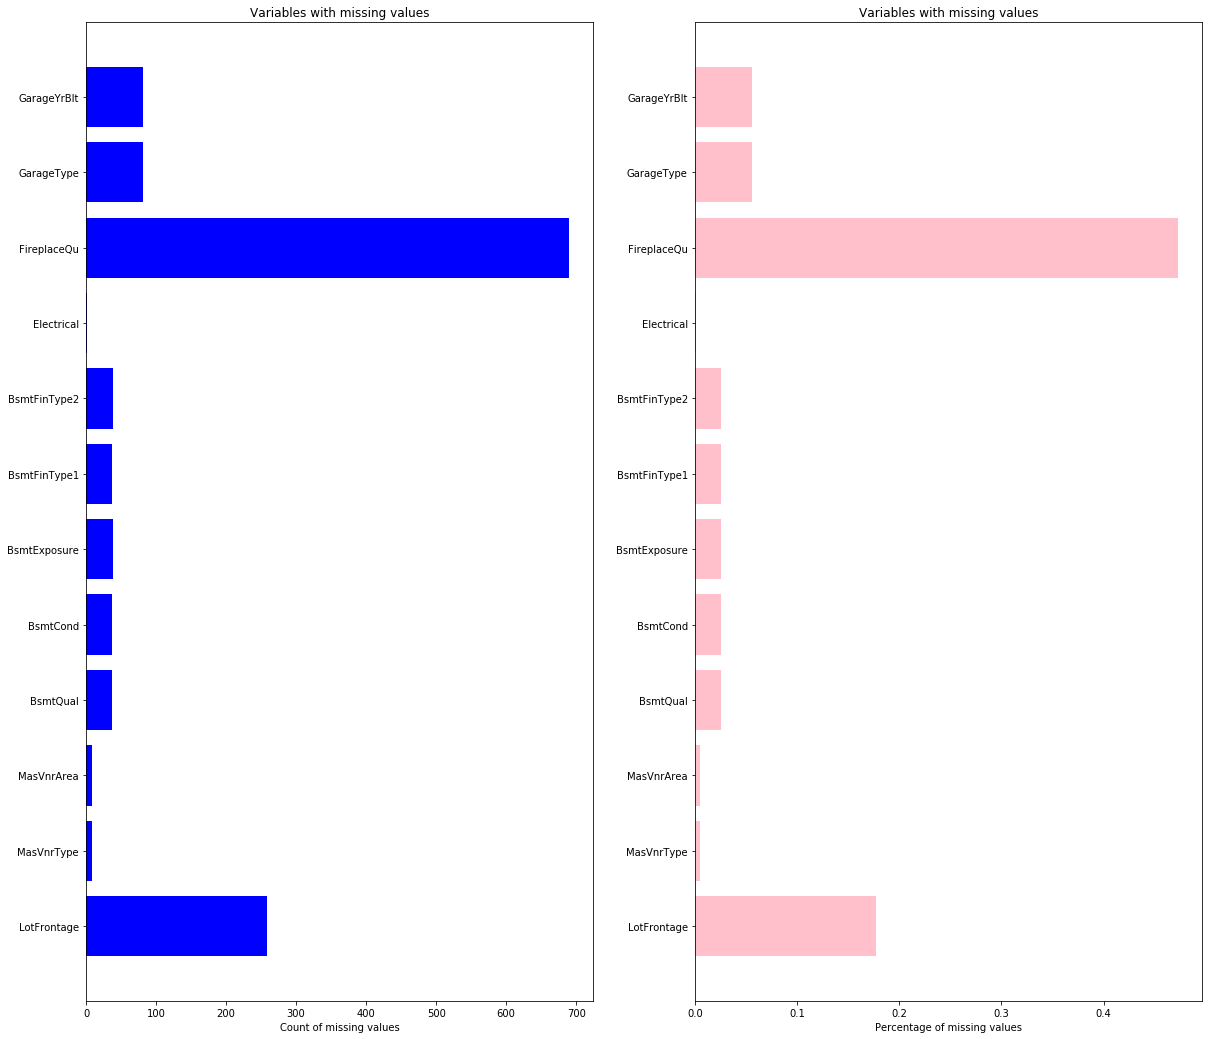

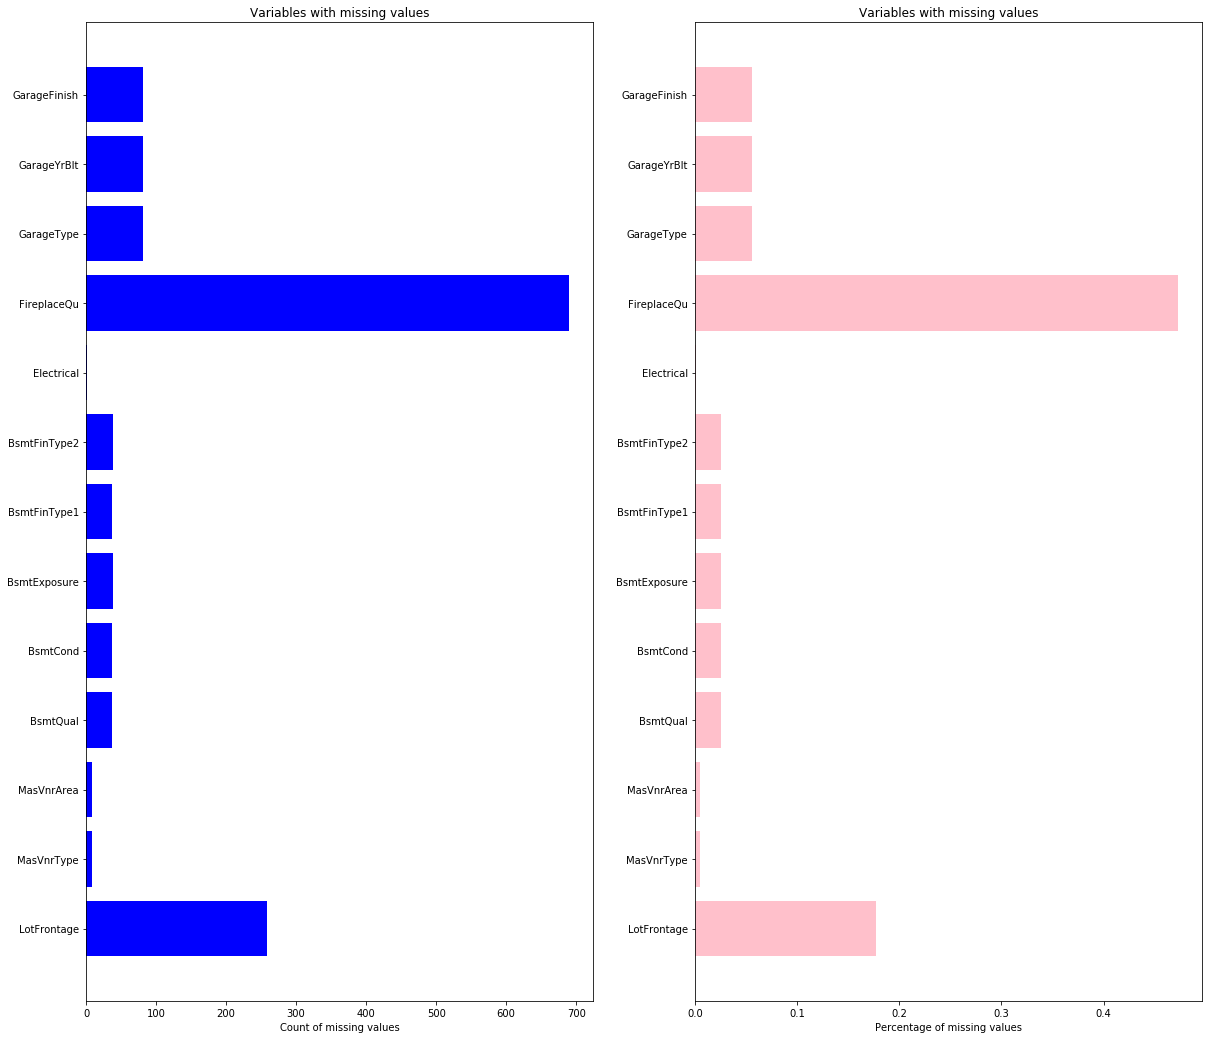

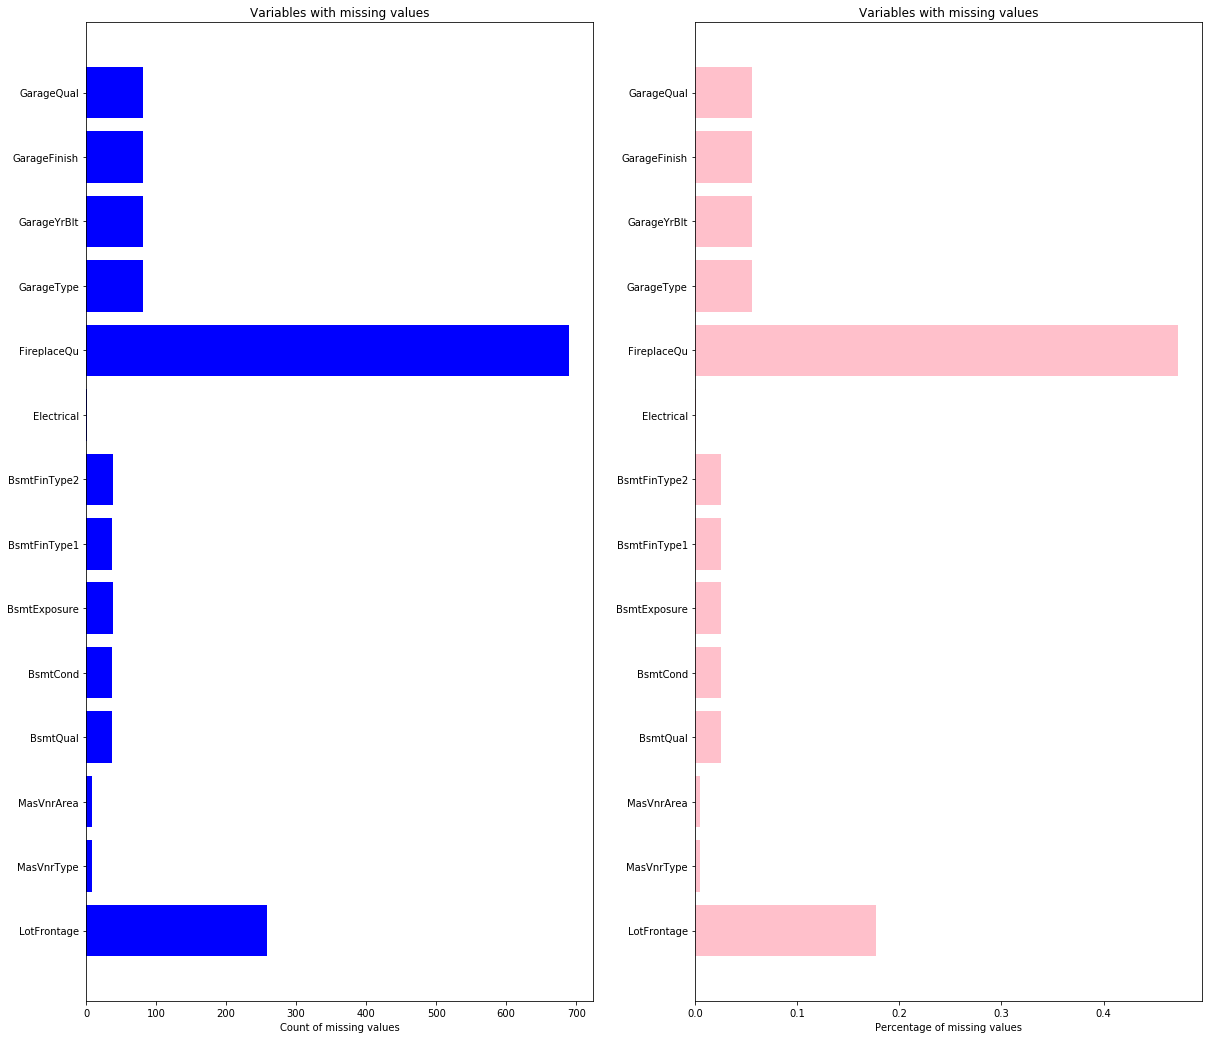

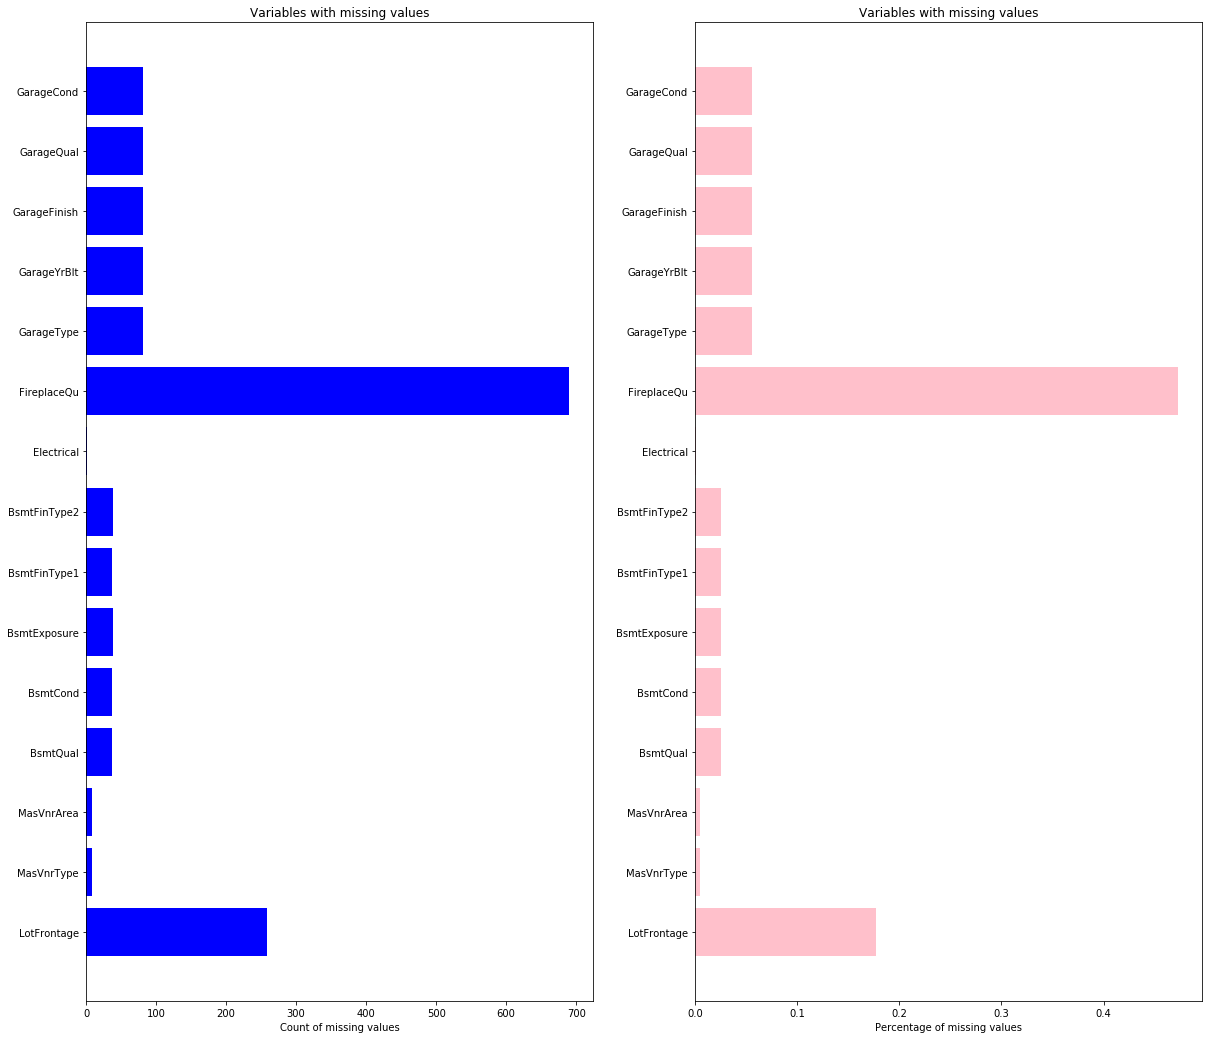

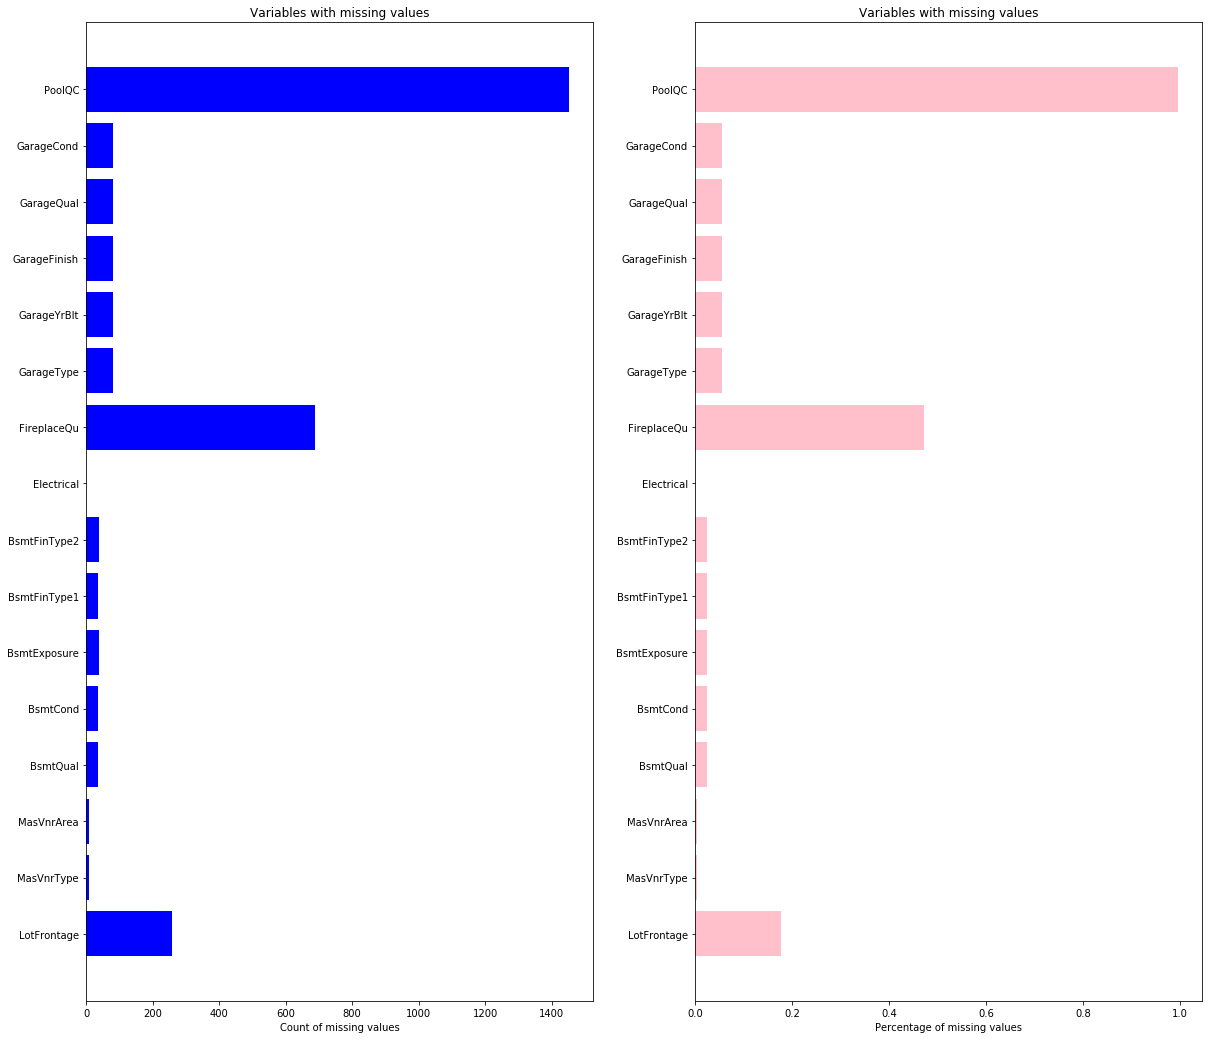

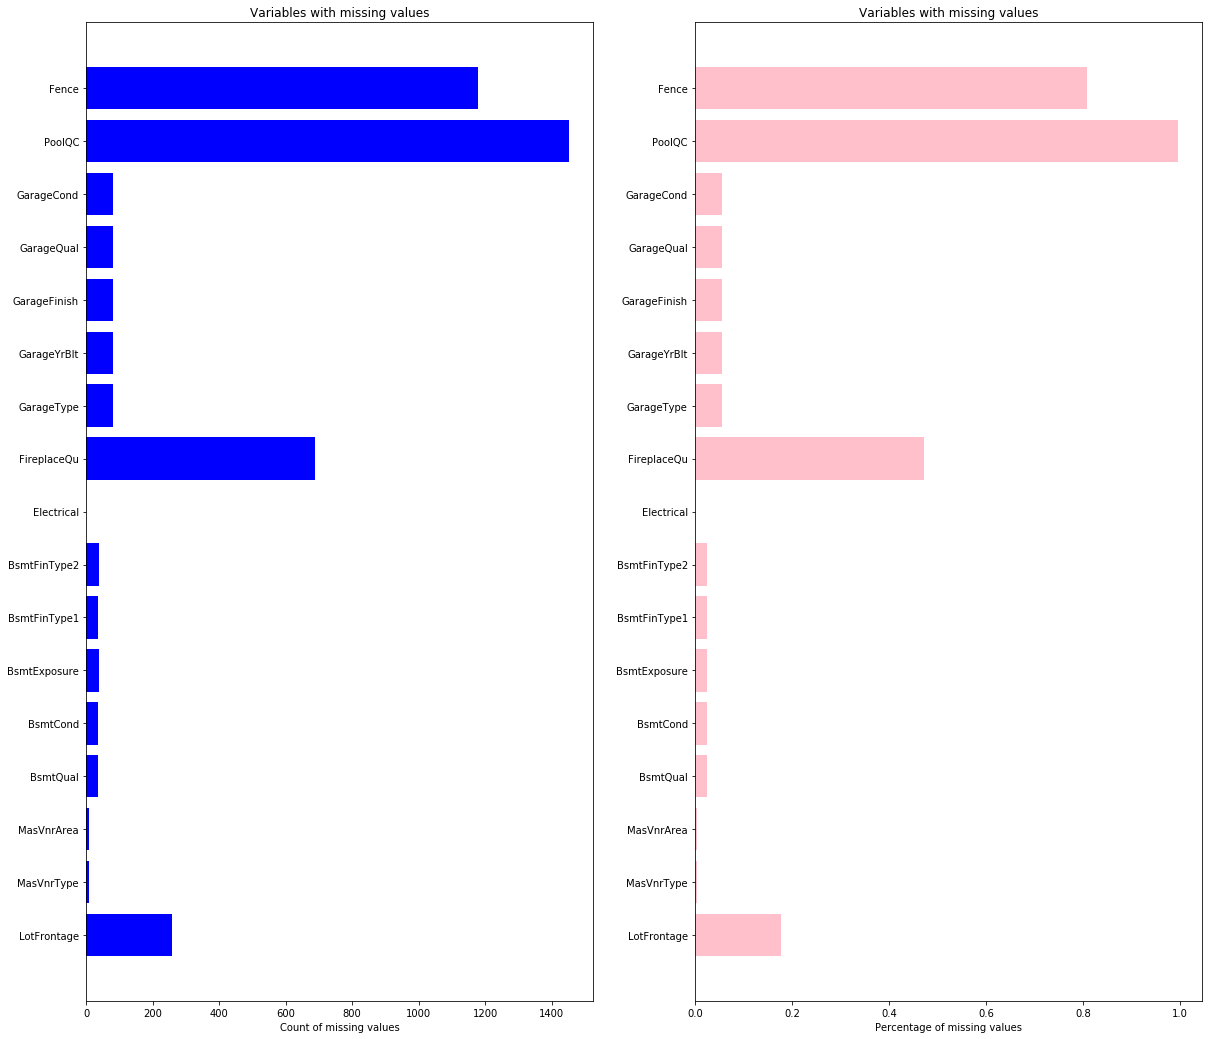

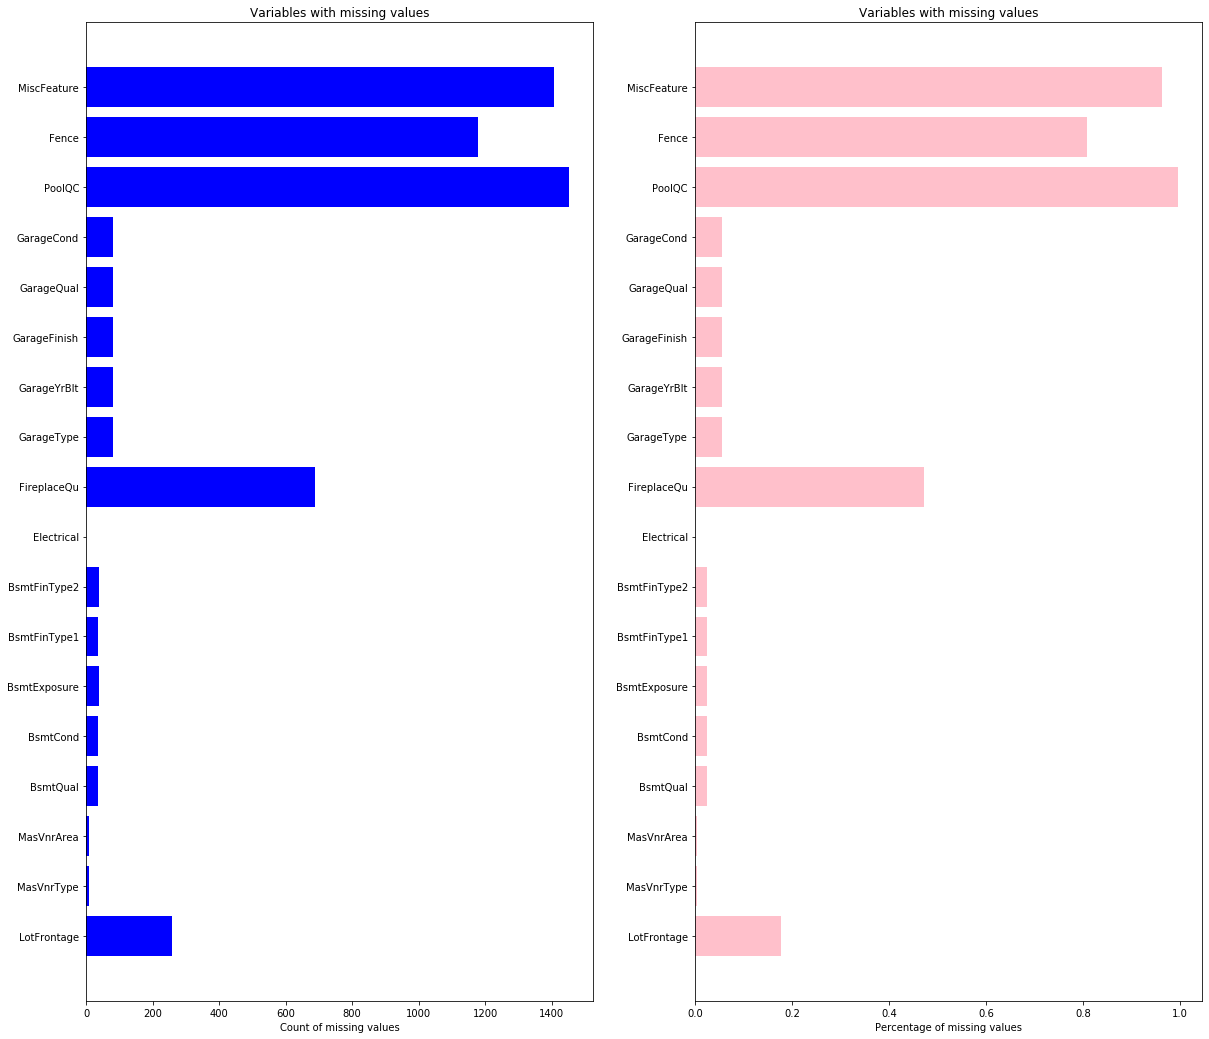

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# To hold variable names
labels = []
# To hold the count of missing values for each variable
valuecount = []

# To hold the percentage of missing values for each variable
percentcount = []
for col in columns_with_missing_values:
    
    labels.append(col)
    valuecount.append(df[col].isnull().sum())
   # housepricesdata.shape[0] will give the total row count

    percentcount.append(df[col].isnull().sum()/df.shape[0])
    ind = np.arange(len(labels))
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,18))

    rects = ax1.barh(ind, np.array(valuecount), color='blue')
    ax1.set_yticks(ind)
    ax1.set_yticklabels(labels, rotation='horizontal')
    ax1.set_xlabel("Count of missing values")
    ax1.set_title("Variables with missing values")

    rects = ax2.barh(ind, np.array(percentcount), color='pink')
    ax2.set_yticks(ind)
    ax2.set_yticklabels(labels, rotation='horizontal')
    ax2.set_xlabel("Percentage of missing values")
    ax2.set_title("Variables with missing values")

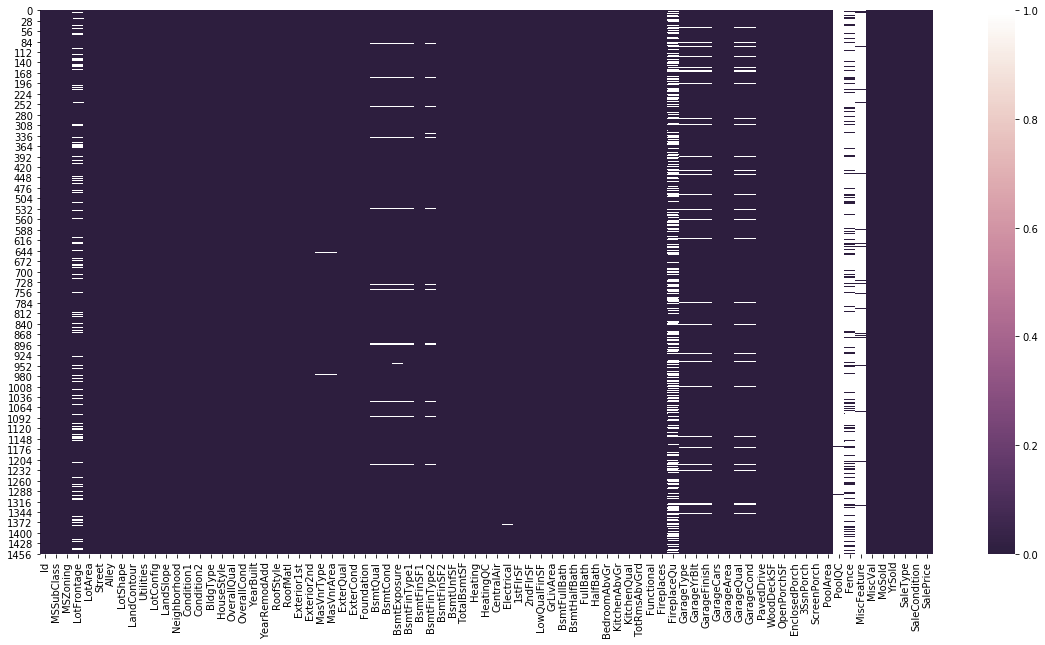

In [12]:
# Lets import seaborn. We will use seaborn to generate our charts
import seaborn as sns

 							
           # We will import matplotlib to resize our plot figure
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

 							
           # cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)


In [13]:
df['FireplaceQu'].isnull().sum()

690

In [14]:
# Replacing missing values with 'No Access' in Alley variable
df['Alley'].fillna('No Access', inplace=True)
		
					
# Filling in the missing values in LotFrontage with its median value
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
					
# Replacing all NA values with their original meaning
df['BsmtQual'].fillna('No Basement', inplace=True)
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)
df['GarageYrBlt'].fillna(0, inplace=True)
					
# For observations where GarageType is null, we replace null values in GarageYrBlt=0
df['GarageType'].fillna('No Garage', inplace=True)
df['GarageFinish'].fillna('No Garage', inplace=True)
df['GarageQual'].fillna('No Garage', inplace=True)
df['GarageCond'].fillna('No Garage', inplace=True)
df['PoolQC'].fillna('No Pool', inplace=True)
df['Fence'].fillna('No Fence', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('No Fireplace', inplace=True)



In [15]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea   PoolQC     Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0  No Pool  No Fence        None       0   
1         Lvl    AllPub  ...        0  No Pool  No Fence        None       0   
2         Lvl    AllPub  ...        0  No Pool  No Fence        None       0   
3         Lvl    AllPub  ...        0  No Pool  No Fence        None       0   
4         Lvl    AllPub  ...        0  No Pool  No Fence        None       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [16]:
df['MiscFeature']

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    Shed
1458    None
1459    None
Name: MiscFeature, Length: 1460, dtype: object

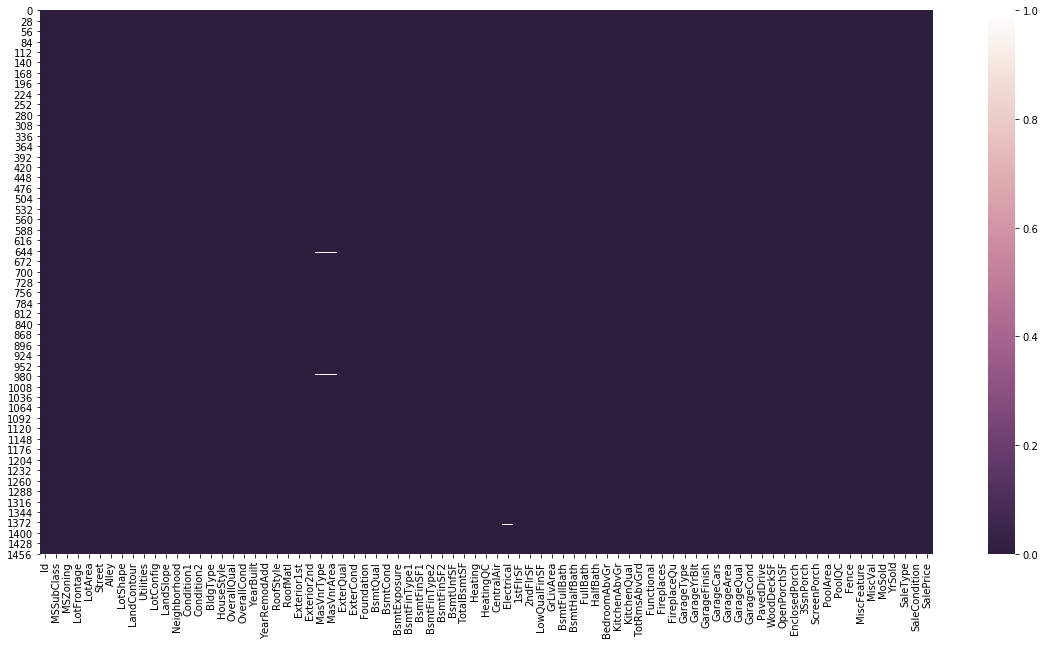

In [17]:
# Lets import seaborn. We will use seaborn to generate our charts
import seaborn as sns

 							
           # We will import matplotlib to resize our plot figure
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

 							
           # cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)


In [18]:
print(pd.crosstab(index=df["MasVnrType"],\
                  columns=df["MasVnrArea"], dropna=False, margins=True))


MasVnrArea  0.0  1.0  11.0  14.0  16.0  18.0  22.0  24.0  27.0  28.0  ...  \
MasVnrType                                                            ...   
BrkCmn        0    0     0     0     0     0     0     0     0     0  ...   
BrkFace       1    0     1     1     6     2     1     0     1     1  ...   
None        859    2     0     0     0     0     0     0     0     0  ...   
Stone         1    0     0     0     1     0     0     1     0     0  ...   
All         861    2     1     1     7     2     1     1     1     1  ...   

MasVnrArea  922.0  975.0  1031.0  1047.0  1115.0  1129.0  1170.0  1378.0  \
MasVnrType                                                                 
BrkCmn          0      0       0       0       0       0       0       0   
BrkFace         1      1       1       1       1       1       1       1   
None            0      0       0       0       0       0       0       0   
Stone           0      0       0       0       0       0       0       0   
All 

In [19]:
# Filling in the missing values for MasVnrType and MasVnrArea with
# None and 0 respectively
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)


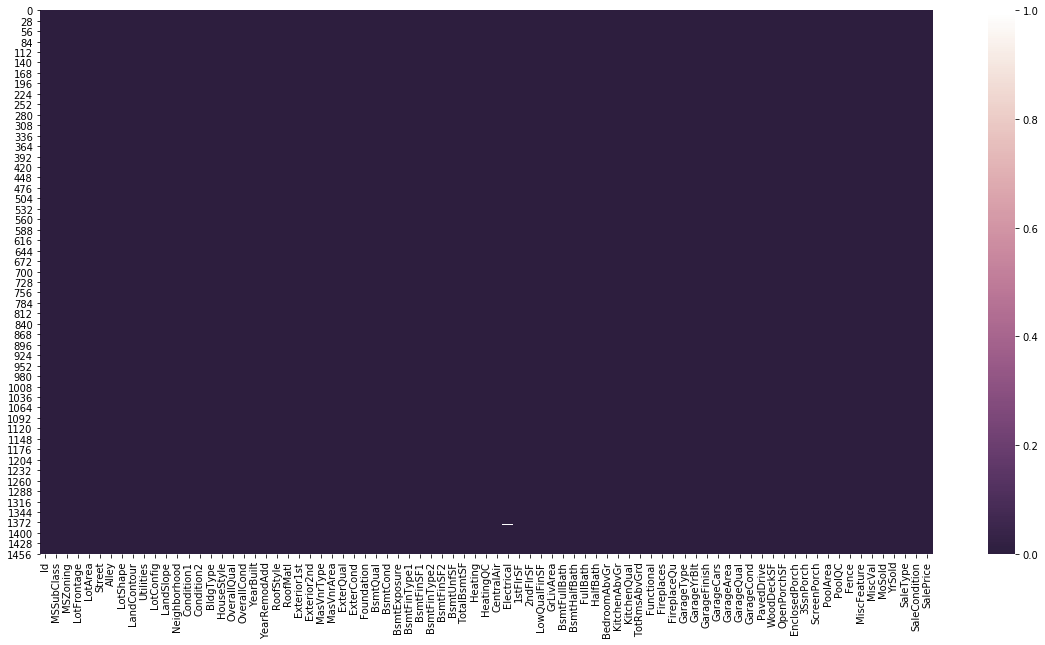

In [20]:
# Lets import seaborn. We will use seaborn to generate our charts
import seaborn as sns

 							
           # We will import matplotlib to resize our plot figure
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

 							
           # cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)


In [21]:
df[(df['Electrical'].isnull())]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave  None      Reg   

     LandContour Utilities  ... PoolArea   PoolQC     Fence MiscFeature  \
1379         Lvl    AllPub  ...        0  No Pool  No Fence        None   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1379       0      5   2008        WD         Normal     167500  

[1 rows x 81 columns]

In [22]:
df['MSSubClass'][df['Electrical'].isnull()]


1379    80
Name: MSSubClass, dtype: int64

In [23]:
# Using crosstab to generate the count of Electrical Type by #MSSubClass
print(pd.crosstab(index=df["Electrical"],\
columns=df['MSSubClass'], dropna=False, margins=True))

MSSubClass   20  30  40  45   50   60  70  75  80  85  90  120  160  180  190  \
Electrical                                                                      
FuseA        31  18   2   3   20    0   8   2   0   0   5    0    0    0    5   
FuseF         5   4   0   2    8    0   2   0   1   0   4    0    0    0    1   
FuseP         0   1   0   0    0    0   0   0   0   0   1    0    0    0    1   
Mix           0   1   0   0    0    0   0   0   0   0   0    0    0    0    0   
SBrkr       500  45   2   7  116  299  50  14  56  20  42   87   63   10   23   
All         536  69   4  12  144  299  60  16  58  20  52   87   63   10   30   

MSSubClass   All  
Electrical        
FuseA         94  
FuseF         27  
FuseP          3  
Mix            1  
SBrkr       1334  
All         1460  


In [24]:
df['Electrical'].fillna(value='SBrkr',inplace=True)

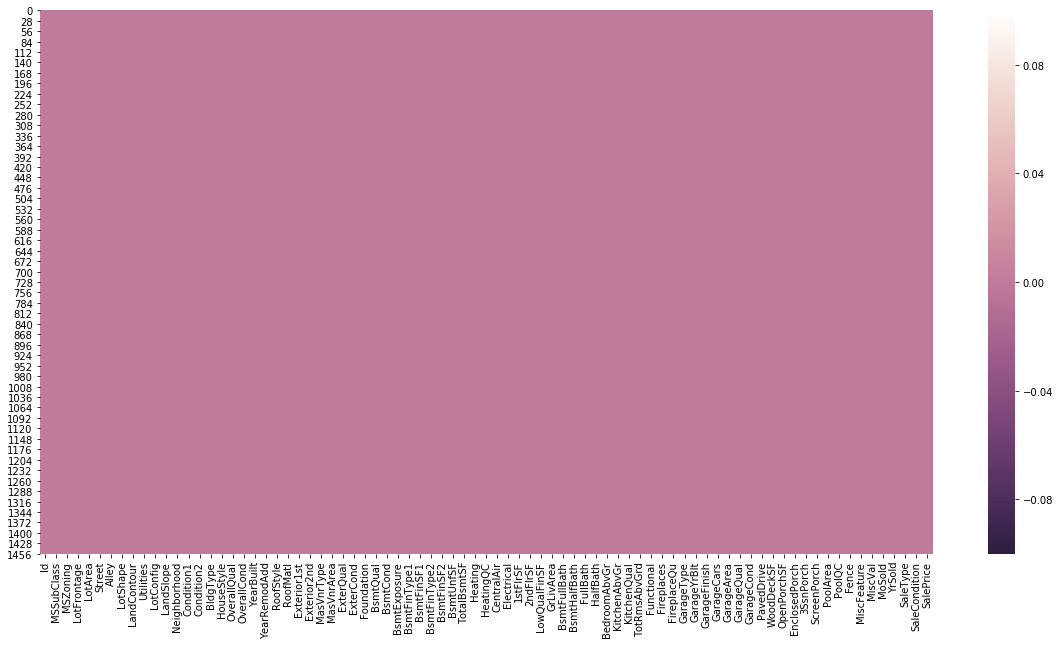

In [25]:
# Lets import seaborn. We will use seaborn to generate our charts
import seaborn as sns

 							
           # We will import matplotlib to resize our plot figure
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

 							
           # cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)


In [26]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None


In [29]:
df['MSSubClass']=df['MSSubClass'].astype('object') 

In [30]:
df['OverallQual']=df['OverallQual'].astype('object') 

In [31]:
df['OverallCond']=df['OverallCond'].astype('object') 

In [33]:
df.drop(columns=['Id'],inplace=True)

In [35]:
df1=df.select_dtypes(exclude=['object'])

In [47]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
x= df1.drop(columns=['SalePrice'], axis=1)
y= df1['SalePrice']
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.10, random_state = 1)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(1314, 33)
(146, 33)
(146,)


In [49]:
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)
print(f'R^2 score for train: {lin_reg.score(x_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(x_test, y_test)}')

R^2 score for train: 0.770041049730574
R^2 score for test: 0.8286354124743655


In [52]:
x_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     161.4
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:47:30   Log-Likelihood:                -17445.
No. Observations:                1460   AIC:                         3.495e+04
Df Residuals:                    1428   BIC:                         3.512e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.442e+05   1.54e+06     -0.484      0.628   -3.76e+06    2.27e+06
LotFrontage      19.1626     53.490      0.358      0.720     -85.766     124.091
LotArea           0.3012      0.111      2.723      0.007       0.084       0.518
YearBuilt       354.1242     57.532      6.155      0.000     241.268     466.980
YearRemodAdd    442.8201     65.001      6.813      0.000     315.313     570.327
MasVnrArea       34.6568      6.454      5.370      0.000      21.996      47.317
BsmtFinSF1       12.7476      2.749      4.638      0.000       7.356      18.139
BsmtFinSF2        0.4287      4.910      0.087      0.930      -9.203      10.061
BsmtUnfSF         4.8401      2.573      1.881      0.060      -0.208       9.888
TotalBsmtSF      18.0165      3.614      4.985      0.000      10.927      25.106
1stFlrSF         23.3920      6.611      3.538      0.000      10.424      36.360
2ndFlrSF         24.1431      6.161      3.919      0.000      12.058      36.228
LowQualFinSF    -16.5052     16.069     -1.027      0.305     -48.027      15.016
GrLivArea        31.0299      6.083      5.101      0.000      19.097      42.963
BsmtFullBath   6602.3013   2837.908      2.326      0.020    1035.385    1.22e+04
BsmtHalfBath    891.9434   4433.117      0.201      0.841   -7804.176    9588.063
FullBath       4152.9900   3069.730      1.353      0.176   -1868.674    1.02e+04
HalfBath      -2938.3573   2898.368     -1.014      0.311   -8623.874    2747.159
BedroomAbvGr   -1.19e+04   1809.983     -6.577      0.000   -1.55e+04   -8354.393
KitchenAbvGr   -4.29e+04   5225.052     -8.210      0.000   -5.31e+04   -3.27e+04
TotRmsAbvGrd   7042.5205   1335.361      5.274      0.000    4423.041    9662.000
Fireplaces     7541.5003   1907.339      3.954      0.000    3800.013    1.13e+04
GarageYrBlt     -12.3522      2.924     -4.224      0.000     -18.088      -6.616
GarageCars      1.84e+04   3238.933      5.681      0.000     1.2e+04    2.48e+04
GarageArea       10.5452     10.666      0.989      0.323     -10.378      31.469
WoodDeckSF       25.9837      8.679      2.994      0.003       8.960      43.008
OpenPorchSF       4.1472     16.517      0.251      0.802     -28.253      36.547
EnclosedPorch    25.6772     18.172      1.413      0.158      -9.969      61.323
3SsnPorch        27.3721     34.168      0.801      0.423     -39.652      94.397
ScreenPorch      66.7149     18.706      3.567      0.000      30.021     103.409
PoolArea        -42.6762     25.870     -1.650      0.099     -93.424       8.072
MiscVal           0.2738      2.015      0.136      0.892      -3.679       4.227
MoSold          374.7953    374.151      1.002      0.317    -359.149    1108.740
YrSold         -383.8537    764.515     -0.502      0.616   -1883.547    1115.840
=================================================

In [67]:
p_columns=[]
for col in x.columns:
    p_value = lin_reg.pvalues[col]
    if p_value<=0.05:
        p_columns.append(col)

In [69]:
x1=x[p_columns]
x1

LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  TotalBsmtSF  \
0        8450       2003          2003       196.0         706          856   
1        9600       1976          1976         0.0         978         1262   
2       11250       2001          2002       162.0         486          920   
3        9550       1915          1970         0.0         216          756   
4       14260       2000          2000       350.0         655         1145   
5       14115       1993          1995         0.0         732          796   
6       10084       2004          2005       186.0        1369         1686   
7       10382       1973          1973       240.0         859         1107   
8        6120       1931          1950         0.0           0          952   
9        7420       1939          1950         0.0         851          991   
10      11200       1965          1965         0.0         906         1040   
11      11924       2005          2006       286.0         998         1175   
12      12968       1962          1962         0.0         737          912   
13      10652       2006          2007       306.0           0         1494   
14      10920       1960          1960       212.0         733         1253   
15       6120       1929          2001         0.0           0          832   
16      11241       1970          1970       180.0         578         1004   
17      10791       1967          1967         0.0           0            0   
18      13695       2004          2004         0.0         646         1114   
19       7560       1958          1965         0.0         504         1029   
20      14215       2005          2006       380.0           0         1158   
21       7449       1930          1950         0.0           0          637   
22       9742       2002          2002       281.0           0         1777   
23       4224       1976          1976         0.0         840         1040   
24       8246       1968          2001         0.0         188         1060   
25      14230       2007          2007       640.0           0         1566   
26       7200       1951          2000         0.0         234          900   
27      11478       2007          2008       200.0        1218         1704   
28      16321       1957          1997         0.0        1277         1484   
29       6324       1927          1950         0.0           0          520   
30       8500       1920          1950         0.0           0          649   
31       8544       1966          2006         0.0           0         1228   
32      11049       2007          2007         0.0           0         1234   
33      10552       1959          1959         0.0        1018         1398   
34       7313       2005          2005       246.0        1153         1561   
35      13418       2004          2005       132.0           0         1117   
36      10859       1994          1995         0.0           0         1097   
37       8532       1954          1990       650.0        1213         1297   
38       7922       1953          2007         0.0         731         1057   
39       6040       1955          1955         0.0           0            0   
40       8658       1965          1965       101.0         643         1088   
41      16905       1959          1959         0.0         967         1350   
42       9180       1983          1983         0.0         747          840   
43       9200       1975          1980         0.0         280          938   
44       7945       1959          1959         0.0         179         1150   
45       7658       2005          2005       412.0         456         1752   
46      12822       2003          2003         0.0        1351         1434   
47      11096       2006          2006         0.0          24         1656   
48       4456       1920          2008         0.0           0          736   
49       7742       1966          1966         0.0      

In [75]:
x_constant = sm.add_constant(x1)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     277.2
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:17:19   Log-Likelihood:                -17452.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1441   BIC:                         3.504e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.535e+06   1.19e+05    -12.873      0.000   -1.77e+06    -1.3e+06
LotArea          0.3059      0.108      2.833      0.005       0.094       0.518
YearBuilt      342.7330     47.848      7.163      0.000     248.875     436.591
YearRemodAdd   466.5594     63.680      7.327      0.000     341.643     591.476
MasVnrArea      34.6160      6.387      5.420      0.000      22.087      47.145
BsmtFinSF1       7.9964      3.290      2.431      0.015       1.543      14.450
TotalBsmtSF     22.7620      4.367      5.212      0.000      14.196      31.328
1stFlrSF        43.2762     21.870      1.979      0.048       0.376      86.176
2ndFlrSF        40.9110     21.478      1.905      0.057      -1.220      83.042
GrLivArea       14.5895     21.316      0.684      0.494     -27.224      56.403
BsmtFullBath  5593.3620   2574.637      2.172      0.030     542.925    1.06e+04
BedroomAbvGr -1.157e+04   1767.792     -6.546      0.000    -1.5e+04   -8103.515
KitchenAbvGr -4.198e+04   5101.562     -8.230      0.000    -5.2e+04    -3.2e+04
TotRmsAbvGrd  7036.7993   1323.493      5.317      0.000    4440.619    9632.979
Fireplaces    7202.3711   1882.065      3.827      0.000    3510.491    1.09e+04
GarageYrBlt    -12.6946      2.866     -4.429      0.000     -18.316      -7.073
GarageCars    2.166e+04   2208.160      9.809      0.000    1.73e+04     2.6e+04
WoodDeckSF      23.2953      8.545      2.726      0.006       6.533      40.058
ScreenPorch     58.4540     18.359      3.184      0.001      22.441      94.467
==============================================================================
Omnibus:                      771.997   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112863.019
Skew:                          -1.414   Prob(JB):                         0.00
Kurtosis:                      45.980   Cond. No.                     1.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x1,y, test_size = 0.10, random_state = 1)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(1314, 18)
(146, 18)
(146,)


In [80]:
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)
print(f'R^2 score for train: {lin_reg.score(x_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(x_test, y_test)}')

R^2 score for train: 0.7678701679779606
R^2 score for test: 0.8289323748786407


In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
ypred=lin_reg.predict(x_test)

In [84]:
mse_norm=mean_squared_error(y_test,ypred)
mse_norm

1287336784.0731075

In [85]:
rmse=np.sqrt(mse_norm)
rmse

35879.475805439346

In [86]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [147]:
#split train and test
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.1, random_state=1)

In [148]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [149]:
print("training score:", train_score )
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.7700410321526925
test score:  0.8286621877552605
number of features used:  33


In [150]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [151]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [152]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [153]:
print("training score for alpha=0.01:"), train_score001 
print("test score for alpha =0.01: "), test_score001
print("number of features used: for alpha =0.01:"), coeff_used001

training score for alpha=0.01:
test score for alpha =0.01: 
number of features used: for alpha =0.01:


(None, 33)

In [154]:
print("LR training score:"), lr_train_score 
print("LR test score: "), lr_test_score

LR training score:
LR test score: 


(None, 0.8286354124743655)

In [155]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [156]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [157]:
print("training score for alpha=0.0001:"), train_score00001 
print("test score for alpha =0.0001: "), test_score00001
print("number of features used: for alpha =0.0001:"), coeff_used00001

training score for alpha=0.0001:
test score for alpha =0.0001: 
number of features used: for alpha =0.0001:


(None, 33)

In [158]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [159]:
print("LR training score:"), lr_train_score 
print("LR test score: "), lr_test_score

LR training score:
LR test score: 


(None, 0.8286354124743655)

In [160]:
x.shape

(1460, 33)

In [161]:
lasso10 = Lasso(alpha=10000, max_iter=10e5)
lasso10.fit(X_train,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [162]:

train_score10=lasso10.score(X_train,y_train)
test_score10=lasso10.score(X_test,y_test)
coeff_used10 = np.sum(lasso10.coef_!=0)

In [163]:
print("training score for alpha=0.0001:"), train_score10
print("test score for alpha =0.0001: "), test_score10
print("number of features used: for alpha =0.0001:"), coeff_used10

training score for alpha=0.0001:
test score for alpha =0.0001: 
number of features used: for alpha =0.0001:


(None, 20)

In [164]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [168]:
print("LR training score:", lr_train_score )
print("LR test score: ", lr_test_score)

LR training score: 0.770041049730574
LR test score:  0.8286354124743655


In [174]:
ypred=lr.predict(X_test)
mse_norm=mean_squared_error(y_test,ypred)
mse_norm

1289571518.0050192

In [175]:
rmse=np.sqrt(mse_norm)
rmse

35910.604534106904